
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [14]:
import math
import io

In [15]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [17]:
poll = pd.read_csv('poll-larger.csv')
poll['vote'].value_counts(normalize=True)

Orgeron    0.5181
Saban      0.4819
Name: vote, dtype: float64

In [24]:
def sample(orgeronWinPercent,n=10000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < orgeronWinPercent,'Orgeron','Saban')})

In [25]:
def samplingdist(orgeronWinPercent,n=10000):
    return pd.DataFrame([sample(orgeronWinPercent,n)['vote'].value_counts(normalize=True) for i in range(1000)])

In [26]:
def quantiles(orgeronWinPercent,n=10000):
    distDF = samplingdist(orgeronWinPercent,n)
    return distDF['Orgeron'].quantile(0.025), distDF['Orgeron'].quantile(0.975)

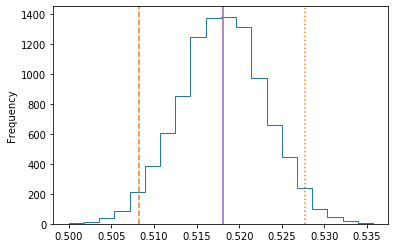

In [27]:
distDF = pd.DataFrame({'Orgeron': [sample(0.5181,10000)['vote'].value_counts(normalize=True)['Orgeron'] for i in range(10000)]})
distDF['Orgeron'].plot(kind='hist', histtype='step', bins=20)

plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.5), c='C4')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')

In [28]:
print(f"The 95% confidence interval is {quantiles(.5181,10000)}")
print(f"The point estimate is {.5181*100} %")
print(f"The margin of error is .5181 +/- {round(.5278-.5085,4)}")

The 95% confidence interval is (0.5085, 0.528)
The point estimate is 51.81 %
The margin of error is .5181 +/- 0.0193
